In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input

from keras.layers import concatenate, add

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

In [4]:
print("There are %d training data with size %d x %d" %x_train0.shape)
print("There are %d testing  data with size %d x %d" %x_test0.shape)

There are 60000 training data with size 28 x 28
There are 10000 testing  data with size 28 x 28


In [5]:
x_train = x_train0.reshape(60000, 784)
x_test = x_test0.reshape(10000, 784)

In [6]:
x_train -= x_train.min()
x_train = x_train/x_train.max()

In [7]:
y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)

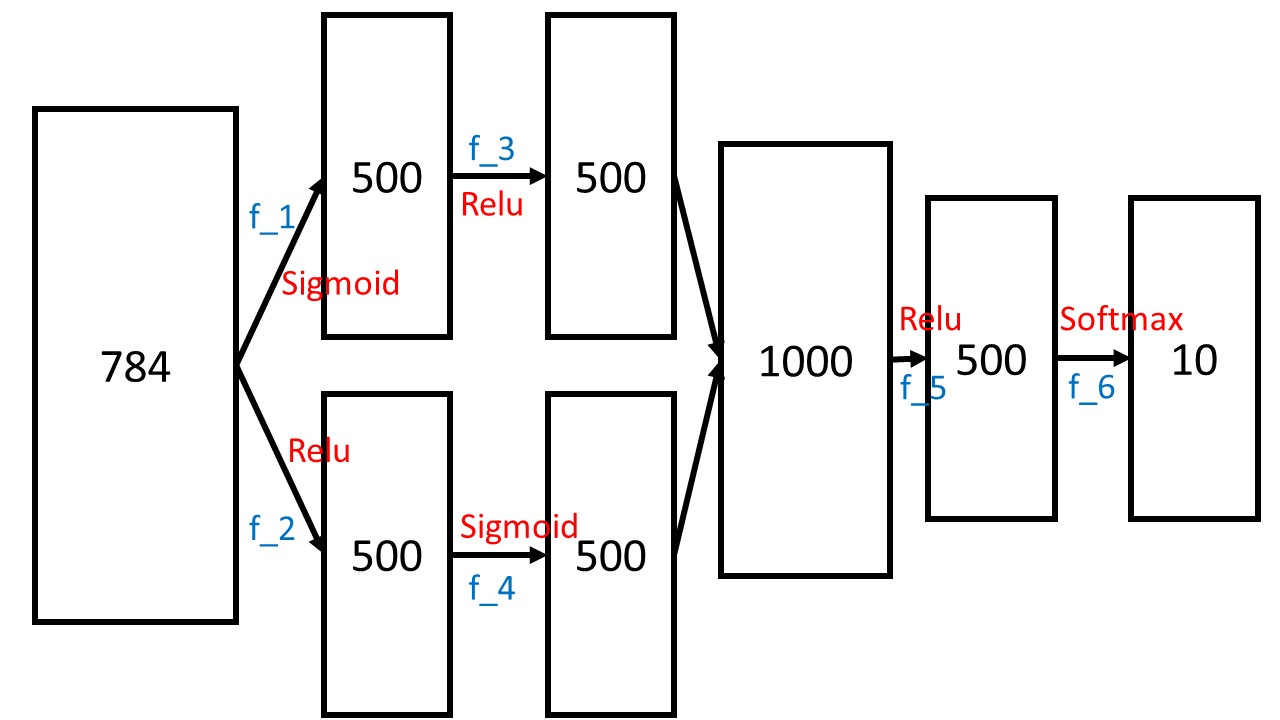

In [8]:
f_1 = Dense(500, activation='sigmoid')
f_2 = Dense(500, activation='relu')
f_3 = Dense(500, activation='relu')
f_4 = Dense(500, activation='sigmoid')
f_5 = Dense(500, activation='relu')
f_6 = Dense(10, activation='softmax')

In [9]:
x = Input(shape=(784,))

In [10]:
h_1 = f_1(x)
h_2 = f_2(x)
h_3 = f_3(h_1)
h_4 = f_4(h_2)
u = concatenate([h_3, h_4])
h_5 = f_5(u)
y = f_6(h_5)

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 500)          392500      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 500)          392500      input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 500)          250500      dense_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (D

In [12]:
model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, batch_size=100, epochs=30)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
60000/60000 [==============================] - 22s 361us/step - loss: 0.0879 - acc: 0.2646
Epoch 2/30
60000/60000 [==============================] - 6s 93us/step - loss: 0.0803 - acc: 0.3971
Epoch 3/30
60000/60000 [==============================] - 5s 90us/step - loss: 0.0654 - acc: 0.5583
Epoch 4/30
60000/60000 [==============================] - 5s 90us/step - loss: 0.0493 - acc: 0.7134
Epoch 5/30
60000/60000 [==============================] - 5s 90us/step - loss: 0.0369 - acc: 0.8023
Epoch 6/30
60000/60000 [==============================] - 5s 91us/step - loss: 0.0286 - acc: 0.8490
Epoch 7/30
60000/60000 [==============================] - 5s 90us/step - loss: 0.0238 - acc: 0.8668
Epoch 8/30
60000/60000 [==============================] - 5s 91us/step - loss: 0.0210 - acc: 0.8767
Epoch 9/30
60000/60000 [==============================] - 5s 90us/step - loss: 0.0192 - acc: 0.8837
Epoch 10/30
60000/60000 [=========================

In [15]:
score = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 94us/step


In [16]:
print('測試資料的 loss:', score[0])
print('測試資料正確率:', score[1])

測試資料的 loss: 0.0153752803584
測試資料正確率: 0.9081
